In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [64]:
file_path = "../data/adult.csv"
df =pd.read_csv(file_path)

df_mask = df[:] != "?"
df = df[df_mask]

df_mask_salary = df["salary"].isin(["<=50K"])
df = df.rename(columns={"salary K$" : "salary_K$"})

df_mask_salary.equals(df["salary_K$"] <= 50)

True

# Task 1
Print the count of men and women in the dataset.

In [68]:
df["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Task 2
Find the average age of men in dataset

In [80]:
men_df = df[df["sex"] == "Male"]
men_df["age"].mean()

39.43354749885268

# Task 3
Get the percentage of people from Poland (native-country)

In [101]:
poland_people = df[df["native-country"] == "Poland"]
len(poland_people) / len(df) * 100

0.18426952489174164

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [108]:
people_salary_more_fifty = df[df["salary_K$"] > 50]
people_salary_less_fifty = df[df["salary_K$"] <= 50]
people_salary_more_fifty["age"].std(), people_salary_less_fifty["age"].std()

(10.519027719851826, 14.02008849082488)

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [111]:
people_without_education = df[(df["education"] == "Prof-school") & (df["salary_K$"] > 50)]

people_without_education

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary_K$
52,52,47,Private,Prof-school,Married-civ-spouse,Prof-specialty,Wife,White,Female,60,Honduras,>50K,254
111,111,38,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,>50K,323
234,234,28,Private,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Male,55,United-States,>50K,73
250,250,41,Private,Prof-school,Married-civ-spouse,Prof-specialty,Wife,White,Female,40,United-States,>50K,247
286,286,41,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,United-States,>50K,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,32238,47,Private,Prof-school,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K,247
32258,32258,51,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,United-States,>50K,332
32370,32370,53,Self-emp-not-inc,Prof-school,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,40,Philippines,>50K,186
32436,32436,37,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,>50K,61


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [117]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [140]:
# maried_men = df[df["marital-status"].str.match("Married")]
# non_maried_men = df[not maried_men]
# maried_men["salary_K$"].mean()
maried_mask = df["marital-status"].str.match("Married")
maried_men = df[maried_mask]
non_maried_men = df[np.invert(maried_mask)]
maried_men["salary_K$"].mean(), non_maried_men["salary_K$"].mean()

(105.98735162482973, 42.71762715818945)

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [194]:
max_hours = df["hours-per-week"].max()
number_of_people = df[df["hours-per-week"] == max_hours]
len(number_of_people.index)

85

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

<Axes: xlabel='hours-per-week', ylabel='salary_K$'>

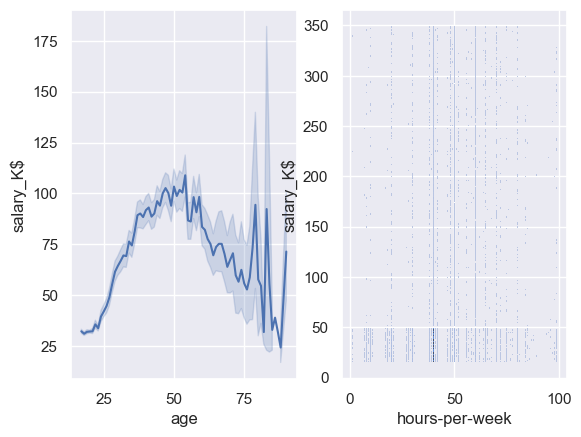

In [195]:
correlation = df.corr(method ='pearson')
sns.set()
fig, ax = plt.subplots(1, 2)
sns.lineplot(x="age", y="salary_K$", data=df, ax=ax[0])
sns.histplot(data=df, x="hours-per-week", y="salary_K$")